In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea
import re

import numpy as np
import pymysql
import time
import urllib
from bs4 import BeautifulSoup

colors = np.random.rand(50)

sea.set_style('dark')
# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.figure.autolayout : True


In [2]:
db = pymysql.connect(host="localhost", # your host, usually localhost
                     user="root", # your username
                      passwd="850718", # your password
                      db="oscar", use_unicode=True, charset="utf8") # name of the data base
cur = db.cursor()

In [4]:
m = 200000
cur.execute("SELECT * FROM topyear_detail_com LIMIT %s"%(m))
row1 =  cur.fetchall()
Runtime = []
Rating = []
Year = []
Votes = []
for row in row1:
    Runtime.append(row[3])
#rating
for row in row1:
	Rating.append(row[8])
#year
for row in row1:
	Year.append(row[5])
#votes
for row in row1:
	Votes.append(row[4])

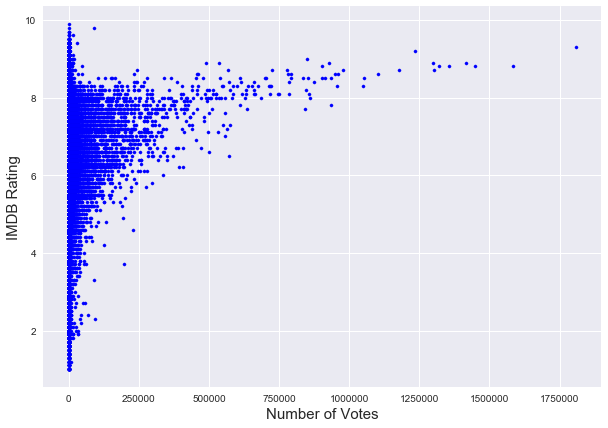

In [6]:
#rating vs votes
fig1 = plt.figure()
plt.xlabel('Number of Votes', fontsize=15)
plt.ylabel('IMDB Rating', fontsize=15)
plt.scatter(Votes, Rating, color='blue', s=10)
plt.grid()
plt.show()

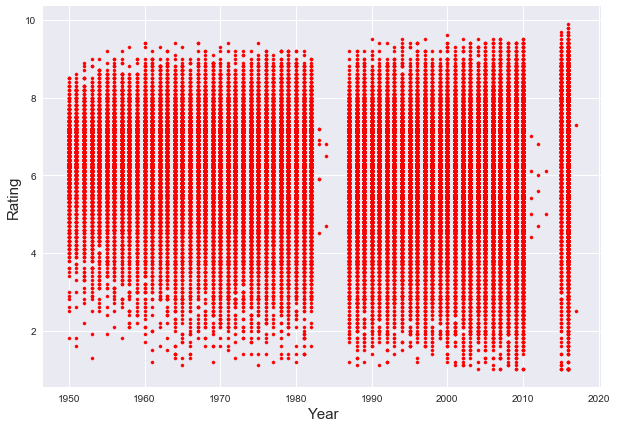

In [7]:
#rating vs year
fig2 = plt.figure()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.scatter(Year, Rating, color='red', s=10)
plt.grid(True)
plt.show()

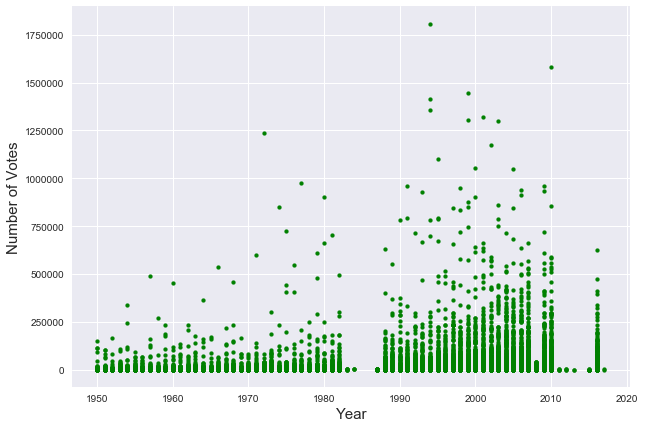

In [8]:
#votes vs year
fig3 = plt.figure()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Votes', fontsize=15)
plt.scatter(Year, Votes, color='Green', s=15)
plt.grid(True)
plt.show()

In [10]:
cur.execute("select year, count(year) as cnt from topyear_detail_com where year > '1950' group by year ")
row2 =  cur.fetchall()
release_year = []
release_year_num = []
#rating
for row in row2:
	release_year.append(row[0])
#year
for row in row2:
	release_year_num.append(row[1])

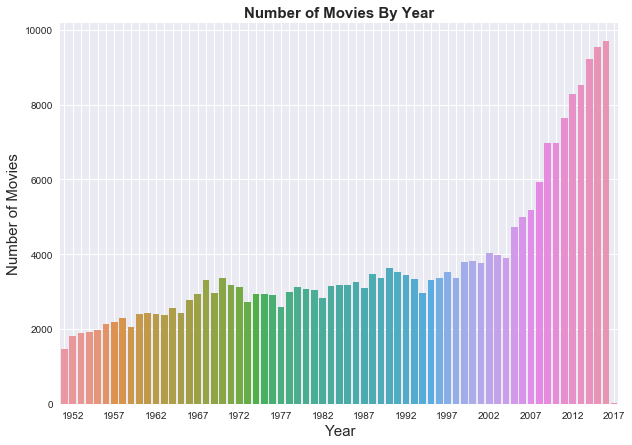

In [11]:
fig4 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies By Year', fontsize=15, fontweight="bold")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
g = sea.barplot(release_year,release_year_num)
for i, label in enumerate(g.get_xticklabels()):
    if i % 5 == 1:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.grid(True)

plt.savefig('Movies Per Year.pdf', format='pdf')


In [12]:
cur.execute("select rating, count(rating) as cnt from topyear_detail_com  group by rating ")
row3 =  cur.fetchall()
movie_rating = []
movie_rating_num = []
#rating
for row in row3:
	movie_rating.append(row[0])
#movie numbers
for row in row3:
	movie_rating_num.append(row[1])

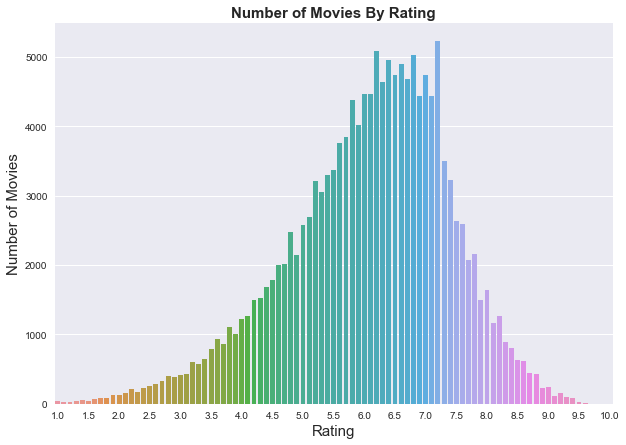

In [13]:
fig5 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies By Rating', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
movie_rating = np.asarray(movie_rating)
movie_rating_num = np.asarray(movie_rating_num)
plt.grid(True)
g_rating = sea.barplot(movie_rating, movie_rating_num)
for i, label in enumerate(g_rating.get_xticklabels()):
    if i % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.savefig('Movies Per Rating.pdf', format='pdf')

In [50]:
cur.execute("select genre, count(genre) as cnt from top10000_genre  group by genre order by cnt desc ")
row4 =  cur.fetchall()
movie_genre = []
movie_genre_num = []
#genre
for row in row4:
	movie_genre.append(row[0])
#count
for row in row4:
	movie_genre_num.append(int(row[1]))

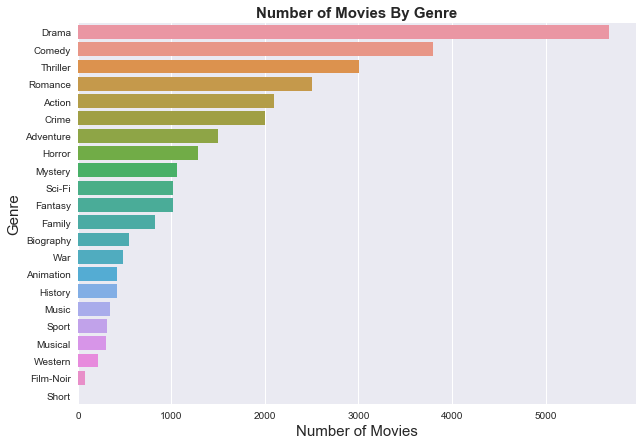

In [52]:
fig6 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies By Genre', fontsize=15, fontweight="bold")
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.grid(True)
movie_genre = np.asarray(movie_genre)
movie_genre_num = np.asarray(movie_genre_num)
movie_genre_num
g_genre = sea.barplot( movie_genre_num, movie_genre)
plt.savefig('Movies By Genre.pdf', format='pdf')
#for i, label in enumerate(g_genre.get_xticklabels()):
#    if i % 5 == 0:  # every 5th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)

In [14]:
cur.execute("SELECT rating, runtime FROM topyear_detail_com WHERE runtime>0 and runtime<'500'")
row5 =  cur.fetchall()
movie_runtime_5 = []
movie_rating_5 = []
#genre
for row in row5:
	movie_rating_5.append(row[0])
#count
for row in row5:
	movie_runtime_5.append(int(row[1]))

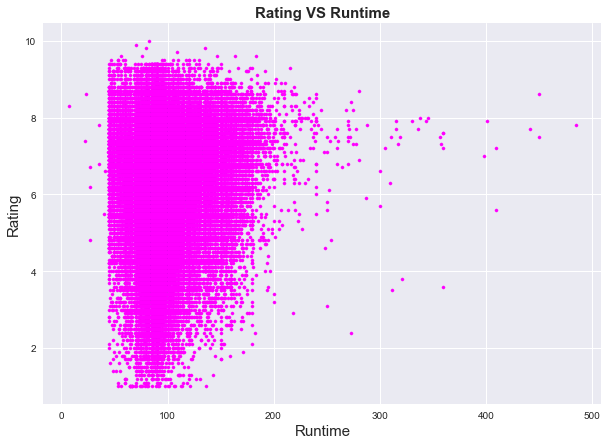

In [15]:
fig7 = plt.figure()
plt.title('Rating VS Runtime', fontsize=15, fontweight="bold")
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Rating', fontsize=15)
movie_rating_5 = np.asarray(movie_rating_5)
movie_runtime_5 = np.asarray(movie_runtime_5)
plt.scatter(  movie_runtime_5, movie_rating_5 , color='magenta', s=10)
plt.grid(True)
plt.savefig('Rating VS Runtime.pdf', format='pdf')

In [21]:
cur.execute("SELECT runtime, count(runtime) as cnt FROM topyear_detail_com WHERE  runtime>0 and runtime<'250' group by runtime order by runtime")
row6 =  cur.fetchall()
movie_runtime_6 = []
movie_runtime_6_num = []
#genre
for row in row6:
	movie_runtime_6.append(row[0])
#count
for row in row6:
	movie_runtime_6_num.append(int(row[1]))

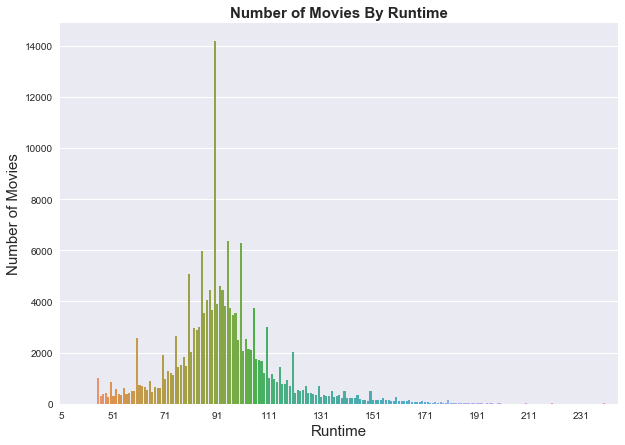

In [22]:
fig8 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies By Runtime', fontsize=15, fontweight="bold")
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.grid(True)
movie_runtime_6 = np.asarray(movie_runtime_6)
movie_runtime_6_num = np.asarray(movie_runtime_6_num)
g_runtime_num = sea.barplot( movie_runtime_6, movie_runtime_6_num)
for i, label in enumerate(g_runtime_num.get_xticklabels()):
    if i % 20 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.savefig('Movies By Runtime.pdf', format='pdf')

In [71]:
cur.execute("select distributor, count(distributor) as cnt from top10000_distributor  where distributor!=' ' and distributor!='The' group by distributor order by cnt desc limit 30 ")
row7 =  cur.fetchall()
movie_distributor = []
movie_distributor_num = []
#genre
for row in row7:
	movie_distributor.append(row[0])
#count
for row in row7:
	movie_distributor_num.append(int(row[1]))

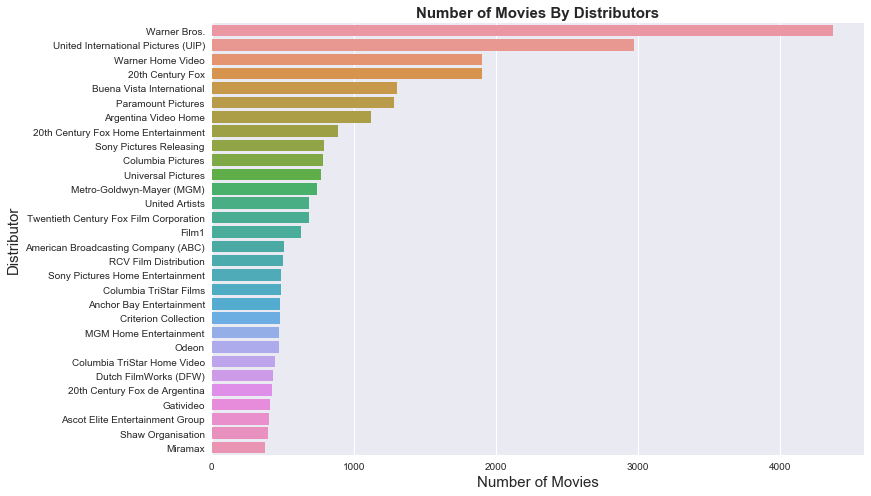

In [72]:
fig9 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies By Distributors', fontsize=15, fontweight="bold")
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Distributor', fontsize=15)
plt.grid(True)
plt.tight_layout()
movie_distributor = np.asarray(movie_distributor)
movie_distributor_num = np.asarray(movie_distributor_num)
movie_distributor
g_distributor = sea.barplot( movie_distributor_num, movie_distributor)
plt.savefig('Movies By Distirbutors.pdf', format='pdf', bbox_inches='tight')
#for i, label in enumerate(g_genre.get_xticklabels()):
#    if i % 5 == 0:  # every 5th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)

In [176]:
cur.execute("select movieName, rating from top10000_detail order by rating desc limit 30 ")
row_rating =  cur.fetchall()
movie_rating_name = []
movie_rating_num = []
#genre
for row in row_rating:
	movie_rating_name.append(row[0])
#count
for row in row_rating:
	movie_rating_num.append(float(row[1]))

[ 9.8  9.6  9.4  9.3  9.2  9.2  9.1  9.   9.   9.   9.   9.   9.   8.9  8.9
  8.9  8.9  8.9  8.9  8.9  8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.8  8.8  8.8]


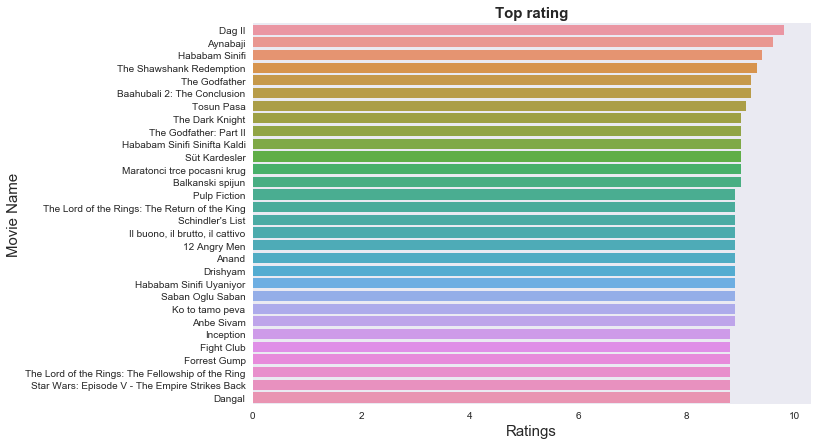

In [177]:
plt.title('Top rating', fontsize=15, fontweight="bold")
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
movie_rating_name = np.asarray(movie_rating_name)
movie_rating_num = np.asarray(movie_rating_num)
g_votes_num = sea.barplot(movie_rating_num, movie_rating_name)
plt.savefig('Top Ratings.pdf', format='pdf', bbox_inches='tight')

In [24]:
cur.execute("select movieName, votes from top10000_detail limit 30")
row8 =  cur.fetchall()
movie_votes_name = []
movie_votes_num = []
#genre
for row in row8:
	movie_votes_name.append(row[0])
#count
for row in row8:
	movie_votes_num.append(int(row[1]))

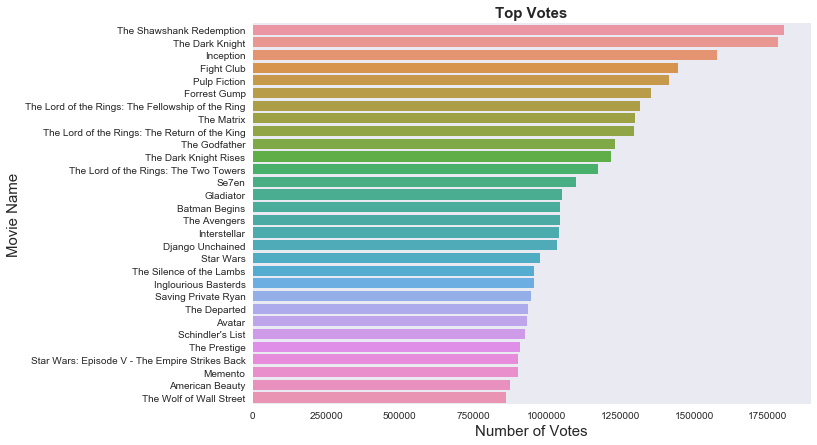

In [166]:
fig10 = plt.figure(figsize=(10, 7))
plt.title('Top Votes', fontsize=15, fontweight="bold")
plt.xlabel('Number of Votes', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
movie_votes_name = np.asarray(movie_votes_name)
movie_votes_num = np.asarray(movie_votes_num)
g_votes_num = sea.barplot(movie_votes_num, movie_votes_name)
plt.savefig('Top Votes.pdf', format='pdf', bbox_inches='tight')

In [29]:
cur.execute("select movieName, gross_world from top10000_detail_3  order by gross_world desc limit 30")
row9 =  cur.fetchall()
movie_gross_name = []
movie_gross_num = []
#genre
for row in row9:
	movie_gross_name.append(row[0])
#count
for row in row9:
	movie_gross_num.append(row[1])

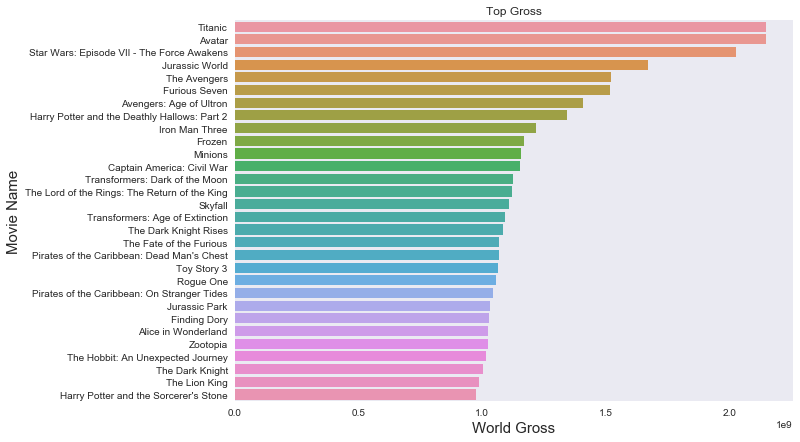

In [31]:
fig11 = plt.figure(figsize=(10, 7))
plt.title('Top Gross', fontsize=15, fontweight="bold")
plt.title('Top G', fontsize=15, fontweight="bold")
plt.xlabel('World Gross', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
movie_gross_name = np.asarray(movie_gross_name)
movie_gross_num = np.asarray(movie_gross_num)
g_gross_num = sea.barplot(movie_gross_num, movie_gross_name)

In [27]:
cur.execute("select mpaa, count(mpaa) as cnt from top10000_detail  where mpaa!=' '  group by mpaa order by cnt  desc limit 4")
row10 =  cur.fetchall()
movie_mpaa = []
movie_mpaa_num = []
#genre
for row in row10:
	movie_mpaa.append(row[0])
#count
for row in row10:
	movie_mpaa_num.append(int(row[1]))

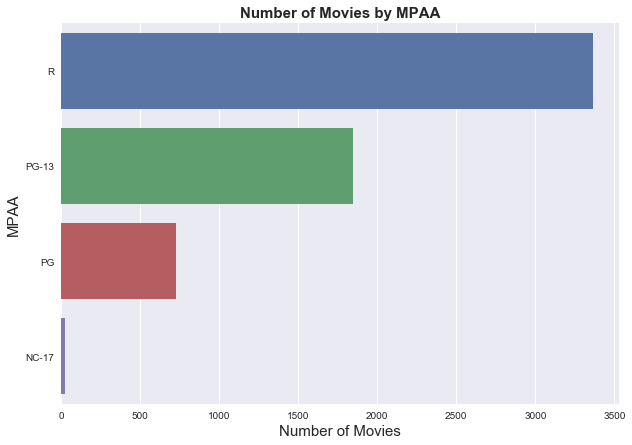

In [73]:
fig12 = plt.figure(figsize=(10, 7))
plt.title('Number of Movies by MPAA', fontsize=15, fontweight="bold")
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('MPAA', fontsize=15)
plt.grid(True)
movie_mpaa = np.asarray(movie_mpaa)
movie_mpaa_num = np.asarray(movie_mpaa_num)
g_mpaa_num = sea.barplot(movie_mpaa_num, movie_mpaa)
plt.savefig('Movies By MPAA.pdf', format='pdf')

In [113]:
cur.execute("select rating, count(rating) as cnt from top10000_detail where mpaa='R' and rating!='' group by rating")
row11 =  cur.fetchall()
movie_mpaa_R = []
movie_rating_R = []
cur.execute("select rating, count(rating) as cnt from top10000_detail where mpaa='PG-13' and rating!='' group by rating")
row12 =  cur.fetchall()
movie_mpaa_PG13 = []
movie_rating_PG13 = []
cur.execute("select rating, count(rating) as cnt from top10000_detail where mpaa='PG' and rating!='' group by rating")
row13 =  cur.fetchall()
movie_mpaa_PG = []
movie_rating_PG = []
#genre
for row in row11:
	movie_mpaa_R.append(row[0])
#count
for row in row11:
	movie_rating_R.append(row[1])

for row in row12:
	movie_mpaa_PG13.append(row[0])
#count
for row in row12:
	movie_rating_PG13.append(row[1])
    
for row in row13:
	movie_mpaa_PG.append(row[0])
#count
for row in row13:
	movie_rating_PG.append(row[1])

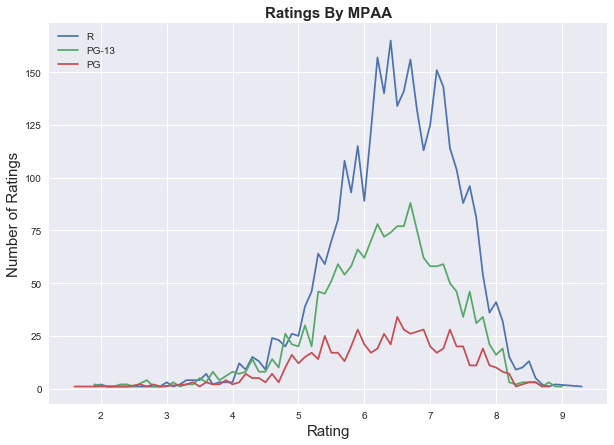

In [164]:
fig13 = plt.figure()
plt.title('Ratings By MPAA', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Ratings', fontsize=15)
movie_mpaa_R = np.asarray(movie_mpaa_R)
movie_rating_R = np.asarray(movie_rating_R)
movie_mpaa_PG13 = np.asarray(movie_mpaa_PG13)
movie_rating_PG13 = np.asarray(movie_rating_PG13)
movie_mpaa_PG = np.asarray(movie_mpaa_PG)
movie_rating_PG = np.asarray(movie_rating_PG)
plt.plot(movie_mpaa_R, movie_rating_R, label='R')
plt.plot(movie_mpaa_PG13, movie_rating_PG13, label='PG-13')
plt.plot(movie_mpaa_PG, movie_rating_PG, label='PG')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Ratings By MPAA.pdf', format='pdf')

In [118]:
cur.execute("select rating, count(rating) as cnt from top10000_detail where genre like ('%Drama%') and rating!='' group by rating")
row14 =  cur.fetchall()
movie_genre_drama = []
movie_rating_drama = []
cur.execute("select rating, count(rating) as cnt from top10000_detail where genre like ('%Comedy%') and rating!='' group by rating")
row15 =  cur.fetchall()
movie_genre_comedy = []
movie_rating_comedy = []
cur.execute("select rating, count(rating) as cnt from top10000_detail where genre like ('%Thriller%') and rating!='' group by rating")
row16 =  cur.fetchall()
movie_genre_thriller = []
movie_rating_thriller = []
#genre
for row in row14:
	movie_genre_drama.append(row[0])
#count
for row in row14:
	movie_rating_drama.append(row[1])

for row in row15:
	movie_genre_comedy.append(row[0])
#count
for row in row15:
	movie_rating_comedy.append(row[1])
    
for row in row16:
	movie_genre_thriller.append(row[0])
#count
for row in row16:
	movie_rating_thriller.append(row[1])

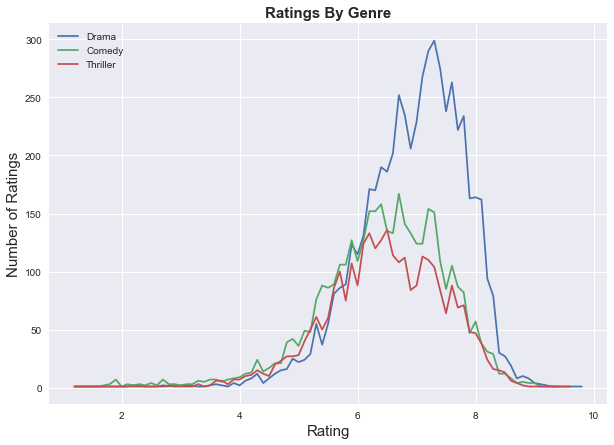

In [165]:
fig14 = plt.figure()
plt.title('Ratings By Genre', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Ratings', fontsize=15)
movie_genre_drama = np.asarray(movie_genre_drama)
movie_rating_drama = np.asarray(movie_rating_drama)
movie_genre_comedy = np.asarray(movie_genre_comedy)
movie_rating_comedy = np.asarray(movie_rating_comedy)
movie_genre_thriller = np.asarray(movie_genre_thriller)
movie_rating_thriller = np.asarray(movie_rating_thriller)
plt.plot(movie_genre_drama, movie_rating_drama, label='Drama')
plt.plot(movie_genre_comedy, movie_rating_comedy, label='Comedy')
plt.plot(movie_genre_thriller, movie_rating_thriller, label='Thriller')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Ratings By Genre.pdf', format='pdf')

In [156]:
cur.execute("select q.rating,  avg(p.gross_world)  from top10000_detail_3 as p, top10000_detail as q where p.movieID = q.movieID and q.gross_world!=' ' and q.rating!=' ' group by q.rating ")
row17 =  cur.fetchall()
movie_rating_17 = []
movie_gross_17 = []
#genre
for row in row17:
	movie_rating_17.append(float(row[0]))
#count
for row in row17:
	movie_gross_17.append(row[1])

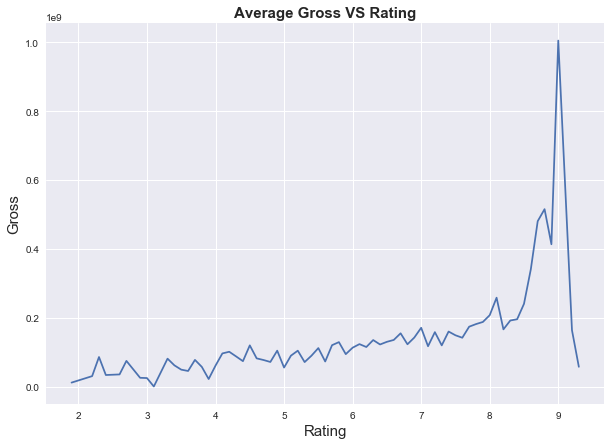

In [158]:
fig17 = plt.figure(figsize=(10, 7))
plt.title('Average Gross VS Rating', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.grid(True)
movie_rating_17 = np.asarray(movie_rating_17)
movie_gross_17 = np.asarray(movie_gross_17)
g_gross_rating = plt.plot(movie_rating_17,movie_gross_17)
plt.savefig('Gross Vs Rating.pdf', format='pdf')

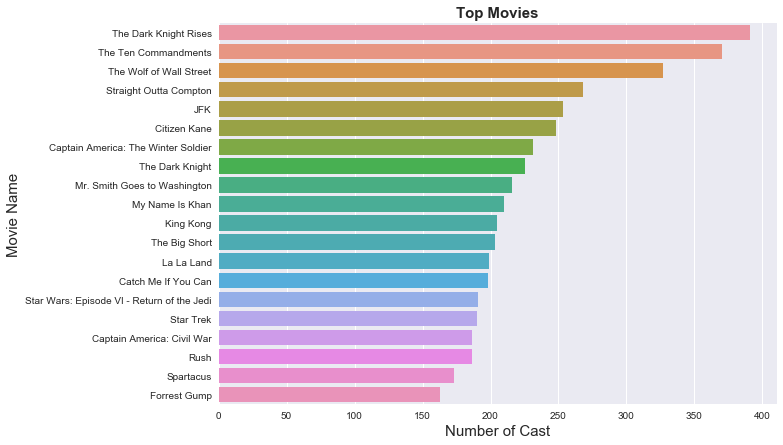

In [228]:
cur.execute("select  movieName, count(movieID) as cnt from top1000_cast group by movieName order by cnt desc limit 20")
row18 =  cur.fetchall()
movie_name_actor = []
movie_name_actor_num = []
#genre
for row in row18:
	movie_name_actor.append(row[0])
#count
for row in row18:
	movie_name_actor_num.append(int(row[1]))
plt.title('Top Movies', fontsize=15, fontweight="bold")
plt.xlabel('Number of Cast', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
plt.grid(True)
movie_name_actor = np.asarray(movie_name_actor)
movie_name_actor_num = np.asarray(movie_name_actor_num)
g_mpaa_num = sea.barplot( movie_name_actor_num, movie_name_actor  )
plt.savefig('Cast.pdf', format='pdf', bbox_inches='tight')

In [28]:
cur.execute("select birthdate, count(birthdate) as cnt from top1000_cast_detail where birthdate>1851 group by birthdate order by birthdate ")
row19 =  cur.fetchall()
movie_cast_19 = []
movie_cast_num_19 = []
#genre
for row in row19:
	movie_cast_19.append(row[0])
#count
for row in row19:
	movie_cast_num_19.append(row[1])

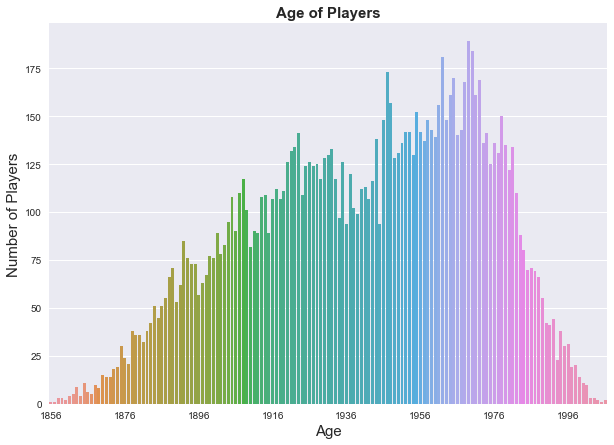

In [30]:
plt.title('Age of Players', fontsize=15, fontweight="bold")
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Players', fontsize=15)
plt.grid(True)
movie_cast_19 = np.asarray(movie_cast_19)
movie_cast_num_19 = np.asarray(movie_cast_num_19)
g_cast_num = sea.barplot( movie_cast_19, movie_cast_num_19)
for i, label in enumerate(g_cast_num.get_xticklabels()):
    if i % 20 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.savefig('Cast Age.pdf', format='pdf', bbox_inches='tight')

In [15]:
cur.execute("select place, count(place) as cnt from top1000_cast_place where place!='' group by place order by cnt desc limit 10")
row20 =  cur.fetchall()
movie_cast_place = []
movie_cast_place_num = []
#genre
for row in row20:
	movie_cast_place.append(row[0])
#count
for row in row20:
	movie_cast_place_num.append(row[1])

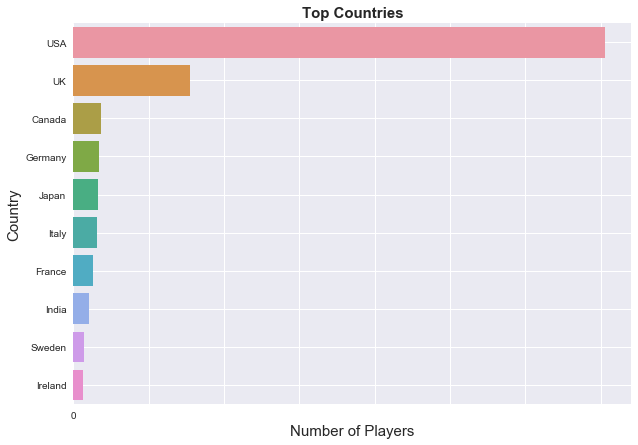

In [19]:
plt.title('Top Countries', fontsize=15, fontweight="bold")
plt.xlabel('Number of Players', fontsize=15)
plt.ylabel('Country', fontsize=15)
movie_cast_place = np.asarray(movie_cast_place)
movie_cast_place_num = np.asarray(movie_cast_place_num)
g_cast_num = sea.barplot( movie_cast_place_num , movie_cast_place)
for i, label in enumerate(g_cast_num.get_xticklabels()):
    if i % 20 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.grid(True)
plt.savefig('Cast Place.pdf', format='pdf', bbox_inches='tight')